 # <center>Big Data Handling

<img src="https://github.com/Ray800413/Big_Data_Handling/blob/master/image/datashader.jpg?raw=true" style="width: 1000px;"/>

# 1. Introduction

The big data trend has dramatically impacted every industry, so it is little surprise that big data in GIS has significant implications for how we acquire and leverage spatial information. Decade ago, the biggest challenges of big data in GIS is hardware. However, with technology development, this is no longer a challenge. The problem nowadays is more about finding people who can manage the huge volume of information and transform it into value for their organizations. Having ability to deal with big data become a must to us, GIS practitioners. 

Many professionals argue that GIS and data science have grown closer together over time in terms of they share lots of similarities. One of the notable examples is the similar workflows. Both beging with data acquisition, data cleaning, data visualization and analysis, and end up with results interpretation. The convergence of GIS and data science is ongoing now. Being familiar with tecnhiques in the field of data science is beneficial for us, GIS practitioners, as we can leverage these techniques to deeper explore our data. 

In this regard, the objective of this project is to create a tutorial on big data handling. The purpose is to learn how to deal with big data in an efficient and elegant manner using common data science techniques. 

In this tutorial, you will learn how to use bash(or shell) commands and high-level python modules to handle big data. The datasets we will use for this tutorial are as the following: 

1. _"New York City Historic Arrest"_ retrieved from [DATA.GOV](https://catalog.data.gov/dataset/nypd-arrests-data-historic/resource/edd46fca-a8d9-41f4-ade2-e720c1bd8314)
2. _"New York State 2017 Generalized Census Tract"_ retrieved from [Census Bureau](https://www2.census.gov/geo/tiger/GENZ2017/shp/)
3. _"New York City 2017 Demographic Data"_ retrieved from [American Fact Finder](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml)

# 2. Data Preparation

In the very first stage. We will take advantage of some bash commands that can help us download datasets and give us a quick view of them without going too deep. This approach is faster compared to use programming languages becasue bash commands do not actually read data into your computer's memory. We will start with downloading datasets required for this tutorial, then take a quick view of them. 

Jupyter Notebook allows you to run bash commands by using magic command **`%%bash`** or adding the exclamation mark **`!`** at the head of your code. In the remaining Notebook, we will use **`!`** to execute bash commands. 

## 2.1 Data Acquisition

To download the datasets, we will use `curl` command. `curl` is a command-line tool for transferring data from or to a server, it supports various protocols, such as HTTP, HTTPs, FTP, and so on. More information about `curl` can be found [here](https://curl.haxx.se/). 

### 2.1.1 NYC Historic Arrest Data

In [1]:
# Download file to the current directory with the name "NYC_Historic_Arrest.csv"
!curl -o NYC_Historic_Arrest.csv https://data.cityofnewyork.us/api/views/8h9b-rp9u/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1047M    0 1047M    0     0  5029k      0 --:--:--  0:03:33 --:--:-- 5051k8k 5104k9k      0 --:--:--  0:02:11 --:--:-- 5164k--:--  0:02:44 --:--:-- 5073k  0  5032k      0 --:--:--  0:02:53 --:--:-- 5346kk      0 --:--:--  0:02:54 --:--:-- 5440k 0 --:--:--  0:02:59 --:--:-- 5099k  5029k      0 --:--:--  0:03:19 --:--:-- 5057kk      0 --:--:--  0:03:28 --:--:-- 4975k


Oftentimes, we would like to download metatdata along with the main data so that we can have more understanding about it. Use the following code to download the metadata of **NYC Historic Arrest** data. 

In [2]:
# Download metadata to the current directory with the name "NYC_Historic_Arrest_Meta.json"
!curl -o NYC_Historic_Arrest_Meta.json https://catalog.data.gov/harvest/object/79e474b1-74e0-4631-8a42-0020c1d4ca61

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1979  100  1979    0     0   3942      0 --:--:-- --:--:-- --:--:--  3942


### 2.1.2 New York State 2017 Generalized Census Tract

In [3]:
# Download it to the current directory with the name "NYC_tract_2017.zip"
!curl -o NYC_tract_2017.zip https://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_36_tract_500k.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1674k    0 1674k    0     0  2709k      0 --:--:-- --:--:-- --:--:-- 2704k


- **_Notion_**: You may wonder why we use 2017 census tract rather than 2018 census tract. This is because the demographic data are only available in 2017. 

### 2.1.3 New York City 2017 Demographic Data

To download the demographic data from American Fact Finder using `curl`, you will have to [request a API key](https://api.census.gov/data/key_signup.html). You are allowed to specialized what kind of demographic information you want and download them all at once. However, you need to construct a valid URL first, which will take you some time to learn. [Check this guide](https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf) to learn how to construct an effective URL. 

In our tutorial, the demographic variables we need are as the following:

| Variable                                | Corresponding Column Code |
| --------------------------------------- |--------------------------:|
| Population of age 25 to 44  | B06001_005E~006E          |
| Male population           | B01001A_002E              |
| Black People population   | B02001_003E               |
| Population below poverty level| B06012_001E   |
| Unemployed population | B06009_002E                   |
| Population with no high school diploma | B23025_005E       |

There are several reasons why we need these variables. First, since we will carry out a multiple regression analysis later, we need to collect some possible explanatory variables in advance. To determine which explanatory variables to collect, we can either leverage existing information inside the dataset or deduce by ourselves. As you will see later in the next section, **age 25~44**, **male**, and **black people** are the mode in their domain. The rest variables, **below average poverty level**, **unemployed** and **no high school diploma** are based on my deduction. Again, this deduction is subjective, you are free to use other explanatory variables you deem appropriate.

In [4]:
# Download it to the current directory with the name "NYC_Demographic_2017.json"
# Make sure you use your own API key
!curl -o NYC_Demographic_2017.json 'https://api.census.gov/data/2017/acs/acs5?get=B06001_005E,B06001_006E,B01001A_002E,B02001_003E,B06012_001E,B06009_002E,B23025_005E&for=tract:*&in=county:005,047,061,081,085&in=state:36&key=a96c2551c131337c9b5853a1685939f1bde7af3d'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  139k    0  139k    0     0  76017      0 --:--:--  0:00:01 --:--:-- 75977


## 2.2 Data Preview

By convention, it is advantageous to take a quick view of the datasets so that we will be able to get their basic information and structure, and discover the underlying problems. Of course, you may wonder we can simply do this by double-click a file and you can get everythin you want. I will not deny that but what if the dataset is too cumbersome for your computer to open? What if you do not have GIS software installed on your computers? These may become even worse if you do not know any programming lanugae. Luckily, there are some existing command line utilities that can tackle these problems. In the following, we will take a look at some of them. 

In this section, problems found and corresponding solutions will be listed. Problems will be solved in next section-**Data Munging**.

### 2.2.1 NYC Historic Arrest Data

For this dataset, we would like to know how many records it cotains, how many columns it has and their names, how the value is presented in each column, and the mode in specific columns. To accomplish these goals, we will use `jq`,`du`, `wc`, `csvkit`, `head`, `sort`, and `uniq` command line utilities. 

1. We first read its metadata using `jq`. In simple terms, `jq` is a JSON processor. It offers extensive functionality for manipulating and working with JSON file. By using the below command, we can know that the recrods start from 2006 and end up in 2018, meaning this data contains 13-year records. More information about `jq` can be found [here](https://stedolan.github.io/jq/).

In [5]:
# Pretty Print the metadata file
!jq "." NYC_Historic_Arrest_Meta.json

{
  "@type": "dcat:Dataset",
  "accessLevel": "public",
  "contactPoint": {
    "@type": "vcard:Contact",
    "fn": "NYC OpenData"
  },
  "description": "List of every arrest in NYC going back to 2006 through the end of the previous calendar year. This is a breakdown of every arrest effected in NYC by the NYPD going back to 2006 through the end of the previous calendar year. This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning before being posted on the NYPD website. Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement. \nIn addition, information related to suspect demographics is also included. \nThis data can be used by the public to explore the nature of police enforcement activity. \nPlease refer to the attached data footnotes for additional information about this dataset.",
  "distribution": [
    {
      "@type": "dcat:Distribution

2. Next, let us see its size and how many records it contains using `du` and `wc`. `du` command, short for disk usage, is used to estimate file space usage. `wc` does word count and tells you how many lines, words, and bytes are in a file. Since it regards header as a single line, we need to minus result by 1 to get the number of records. According to the output below, we know there are 4,798,339 records. According to the output, we can know that it will be cumbersome for computer to read it via application such as Excel. This is where programming languages come in to play. They could help us read large datasets without crashing your computer and are able to promote the speed of analysis.  More information about `du` can be found [here](https://en.wikipedia.org/wiki/Du_(Unix)) and `wc` can be found [here](https://en.wikipedia.org/wiki/Wc_(Unix)).

In [6]:
# Print file size in human readable format
!du -h NYC_Historic_Arrest.csv

1.0G	NYC_Historic_Arrest.csv


In [7]:
# Display how many lines are there in the data
!wc -l NYC_Historic_Arrest.csv

 5012957 NYC_Historic_Arrest.csv


3. Next, we wil use `head` and `csvkit` to see the number of columns and their names and how the value is presented in each column. `head` command prints N number of data of the given input. `csvkit` is a handy toolkit for converting to and working with CSV. It composes several ad hoc command-line tools. We will use `csvcut` and `csvlook` to help us accomplish the task. More information about `csvkit` can be found [here](https://csvkit.readthedocs.io/en/1.0.2/).

In [8]:
# Display the numer of columns and their names 
!csvcut -n NYC_Historic_Arrest.csv

  1: ARREST_KEY
  2: ARREST_DATE
  3: PD_CD
  4: PD_DESC
  5: KY_CD
  6: OFNS_DESC
  7: LAW_CODE
  8: LAW_CAT_CD
  9: ARREST_BORO
 10: ARREST_PRECINCT
 11: JURISDICTION_CODE
 12: AGE_GROUP
 13: PERP_SEX
 14: PERP_RACE
 15: X_COORD_CD
 16: Y_COORD_CD
 17: Latitude
 18: Longitude
 19: Lon_Lat


In [9]:
# Display the first record values in column 1~7
!head -n2 NYC_Historic_Arrest.csv | csvcut -c1-7 | csvlook

|  ARREST_KEY | ARREST_DATE | PD_CD | PD_DESC                  | KY_CD | OFNS_DESC      | LAW_CODE   |
| ----------- | ----------- | ----- | ------------------------ | ----- | -------------- | ---------- |
| 190,294,601 |  2018-11-23 |   109 | ASSAULT 2,1,UNCLASSIFIED |   106 | FELONY ASSAULT | PL 1200512 |


In [10]:
# Display the first record values in column 8~13
!head -n2 NYC_Historic_Arrest.csv | csvcut -c7-13 | csvlook

| LAW_CODE   | LAW_CAT_CD | ARREST_BORO | ARREST_PRECINCT | JURISDICTION_CODE | AGE_GROUP | PERP_SEX |
| ---------- | ---------- | ----------- | --------------- | ----------------- | --------- | -------- |
| PL 1200512 |      False | B           |              40 |             False | 25-44     | M        |


In [11]:
# Display the first record values in the rest columns
!head -n2 NYC_Historic_Arrest.csv | csvcut -c14- | csvlook

| PERP_RACE | X_COORD_CD | Y_COORD_CD | Latitude | Longitude | Lon_Lat                                       |
| --------- | ---------- | ---------- | -------- | --------- | --------------------------------------------- |
| BLACK     |  1,008,096 |    233,595 |  40.808… |  -73.914… | POINT (-73.91386266099995 40.807816227000046) |


4. Sometimes, we might be interested in knowing the uniq values in a specific column and getting the mode. This can also be accomplished using two command line utilities: `sort` and `uniq`.  In the following code, we first use `csvcut` to filter out the column we want to look at, then we use `sort` command to arrange the records in an alphabetical order. `uniq` command will remove duplicated lines and when it combine with argument `-c`, it will count the repetitions for each line. Then, we apply `sort` command with argument `-nr` to arrange the records in a numeric order. At the end, we use `head` command with argument `-n1` to return the mode. More information about `sort`, click [here](https://en.wikipedia.org/wiki/Sort_(Unix)). More information about `uniq`, clik [here](https://en.wikipedia.org/wiki/Uniq).
    - **_Notion_**: For `uniq` to work, you must first using `sort` to rearrange the file. 

In [12]:
# Display the mode in "AGE_GROUP" column
!csvcut -c12 NYC_Historic_Arrest.csv | sort | uniq -c | sort -nr | head -n1

2316358 25-44


In [13]:
# Display the mode in "PERP_SEX" column
!csvcut -c13 NYC_Historic_Arrest.csv | sort | uniq -c | sort -nr | head -n1

4171564 M


In [14]:
# Display the mode in "PERP_RACE" column
!csvcut -c14 NYC_Historic_Arrest.csv | sort | uniq -c | sort -nr | head -n1

2433510 BLACK


___
**_Problems Found and Corresponding Solutions:_**

1. Some columns store information that are unnecessary and redundant, such as **ARREST_KEY** and **X_COORD_CD**.
>Only use necessary columns.

3. While they are not presented in the above outputs, these problems may exist in this data, such as records containing null values and record location outside the extenet of the study area. 
>Remove records having null values and outside New York City
___

### 2.2.2 New York State 2017 Generalized Census Tract

Shapefile is a proprietary file format developed by ESRI. It is the legacy file format for storing spatial data, yet still prevalent in GIS world. Oftentimes, when you want to read it, you will need the help of GIS software, such as QGIS and ArcGIS. However, you can do that outside these environment using `GDAL` command line utility. Though its functionality is less comprehensive than Python `GDAL` library, it comes in handay when you want to quickly get basic information about a dataset, converting between geospatial file types and projection, and more. The command-line tool we will use is `ogrinfo`. More information about `GDAL` command line utility can be found [here](https://gdal.org/programs/index.html).

We first use the `unzip` command line utility to unzip the census tract file to a new directory.

In [15]:
# Unzip the file to a new folder named "NYC_tract" and then remove the zip file
!unzip NYC_tract_2017.zip -d NYC_tract_2017 && rm NYC_tract_2017.zip

Archive:  NYC_tract_2017.zip
  inflating: NYC_tract_2017/cb_2017_36_tract_500k.shp.ea.iso.xml  
  inflating: NYC_tract_2017/cb_2017_36_tract_500k.shp.iso.xml  
  inflating: NYC_tract_2017/cb_2017_36_tract_500k.shp.xml  
  inflating: NYC_tract_2017/cb_2017_36_tract_500k.shp  
  inflating: NYC_tract_2017/cb_2017_36_tract_500k.shx  
  inflating: NYC_tract_2017/cb_2017_36_tract_500k.dbf  
  inflating: NYC_tract_2017/cb_2017_36_tract_500k.prj  
 extracting: NYC_tract_2017/cb_2017_36_tract_500k.cpg  


In [16]:
# Print file size in human readable format
!du -h NYC_tract_2017/cb_2017_36_tract_500k.shp

2.5M	NYC_tract_2017/cb_2017_36_tract_500k.shp


In [17]:
# Get basic information from the shaepfile
!ogrinfo -al -so NYC_tract_2017/cb_2017_36_tract_500k.shp

INFO: Open of `NYC_tract_2017/cb_2017_36_tract_500k.shp'
      using driver `ESRI Shapefile' successful.

Layer name: cb_2017_36_tract_500k
Metadata:
  DBF_DATE_LAST_UPDATE=2018-03-06
Geometry: Polygon
Feature Count: 4906
Extent: (-79.762152, 40.496103) - (-71.856214, 45.015850)
Layer SRS WKT:
GEOGCRS["NAD83",
    DATUM["North American Datum 1983",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4269]]
Data axis to CRS axis mapping: 2,1
STATEFP: String (2.0)
COUNTYFP: String (3.0)
TRACTCE: String (6.0)
AFFGEOID: String (20.0)
GEOID: String (11.0)
NAME: String (100.0)
LSAD: String (2.0)
ALAND: Integer64 (14.0)
AWATER: Integer64 

In [18]:
# See how the values are presented in the shapefile
!ogrinfo -q NYC_tract_2017/cb_2017_36_tract_500k.shp -sql "SELECT * FROM cb_2017_36_tract_500k" -fid 1


Layer name: cb_2017_36_tract_500k
OGRFeature(cb_2017_36_tract_500k):1
  STATEFP (String) = 36
  COUNTYFP (String) = 001
  TRACTCE (String) = 000600
  AFFGEOID (String) = 1400000US36001000600
  GEOID (String) = 36001000600
  NAME (String) = 6
  LSAD (String) = CT
  ALAND (Integer64) = 506881
  AWATER (Integer64) = 0
  POLYGON ((-73.77924 42.671159,-73.77148 42.666681,-73.771111 42.666475,-73.769119 42.665326,-73.768845 42.665167,-73.766936 42.664018,-73.768001 42.66296,-73.770763 42.661051,-73.772852 42.662289,-73.774304 42.660907,-73.779838 42.662685,-73.778383 42.66404,-73.77742 42.664931,-73.776833 42.665509,-73.775293 42.667241,-73.776979 42.668651,-73.780354 42.671637,-73.77924 42.671159))



___
**_Problems Found and Corresponding Solutions:_**
1. The number of census tracts is way more than the number of census tracts belongs to New York City, which is because this shapefile was downloaded in the unit of state.
> Extract the census tracts belongs to New York City.
2. This is a potential problem that hard to discover: Multiple census tract have the same value. This is problematic because we will use it as the foreign key to carry out join operation later. 
> Create a new foreign-key column. 
3. The projection is **EPSG:4269**, which will lead to mistakes when perform spatial join with **NYC Historic Arrest** data as they are in the different coordinate systems.
> Convert projection to **EPSG:4326**. 
4. Unnecessary columns that can be neglected, such as **LSAD** and **ALAND**.
> Only use necessary columns. 
5. The size of this data is kind of large, which might hinder the rendering speed.
> Convert it to GeoJson.
___

### 2.2.3 New York City 2017 Demographic Data

To view this data, we first convert it into CSV view using `in2csv` command line tool coming with `csvkit` toolkit and then use command line utilities introduced above to get its information. Since the header is in the second line, we will have to start to read it from there. Combination of `head` and `tail` commands can help us read the second line. `tail` is like `head` but it starts from the last part in a file. 

In [19]:
# Display the number of columns and their names
!in2csv NYC_Demographic_2017.json | head -n3 | tail -n2 | csvcut -n

  1: B06001_005E
  2: B06001_006E
  3: B01001A_002E
  4: B02001_003E
  5: B06012_001E
  6: B06009_002E
  7: B23025_005E
  8: state
  9: county
 10: tract


In [20]:
# Display the first record values in column 1~6
!in2csv NYC_Demographic_2017.json | head -n3 | tail -n2 | csvcut -c1-5 | csvlook

| B06001_005E | B06001_006E | B01001A_002E | B02001_003E | B06012_001E |
| ----------- | ----------- | ------------ | ----------- | ----------- |
|         518 |         208 |          563 |          10 |       1,565 |


In [21]:
# Display the first record values in the rest columns
!in2csv NYC_Demographic_2017.json | head -n3 | tail -n2 | csvcut -c6- | csvlook

| B06009_002E | B23025_005E | state | county |  tract |
| ----------- | ----------- | ----- | ------ | ------ |
|         201 |          59 |    36 |     81 | 11,900 |


___
**_Problems Found and Corresponding Solutions:_**
1. Some of the column names are confused and not descriptive. 
> Rename these columns.
2. Column names denoting geographic entities are different from the column names in the previous shapefile. Since we will need to merge these two datasets later to perform a multiple regression analysis, these column names should be changed to be identical. A foreign-key column will need to be created, too.
> Renmae these columns and create a new foreign-key column.
3. Header names is incorrect.
> Replace it by correct column names.
4. age columns (**B06001_005E** and **B06001_006E**) are separated and there is a need to have new column to represent the population of Age 25-44. 
> Create a new column to represent the population of age 25-44 by summing two age columns (**B06001_005E** and **B06001_006E**).
___

# 3. Data Munging

In this stage, we are going to make our datasets become usable for later visualization and analysis. The cleaning tasks are based on the problems we found in the previous section. To accomplish these tasks, we will use some Python workhorse modules, such as `pandas` and `re`. In the below block, you can see I import all the necessary libraries for this tutorial at once. This is my personal habit becasue it will make my notebook looks more organized. 

In [22]:
import os # Used for path management
import warnings # Used to suppress warning message
import pandas as pd # Used for reading data into tabular format
import geopandas as gpd # Used for reading spatial data into tabular format
import matplotlib.pyplot as plt # Used for data visualization
import contextily as ctx # Used for adding basemap
import datashader as ds # Used for data visualization
import bokeh.plotting as bp # Used for creating interactive images
import statsmodels.api as sm # Used for assessing accuracy of predicator

from shapely.geometry import Point # Used for point geometry creation
from IPython.display import HTML # Used for displaying gif file
from datashader import transfer_functions as tf # Used for color mapping
from datashader.utils import lnglat_to_meters as webm # Used for coordinate transformation
from datashader.colors import Set1, Hot # Used for color mapping
from datashader.bokeh_ext import create_categorical_legend, InteractiveImage # Used for creating legend and enabling interactivity
from bokeh.io import output_notebook, show # Used for plotting in the notebook
from bokeh.models.tiles import WMTSTileSource # Used for obtaining WMTS basemap 
from sklearn.linear_model import LinearRegression # Used for regression analysis

%matplotlib inline
output_notebook() # Render inline in a Jupyter Notebook, output bokeh plots to jupyter notebook
path = os.getcwd()  # Used for getting current working directory path
warnings.filterwarnings('ignore') # Suppress warning

Loading BokehJS ...

## 3.1 NYC Historic Arrest Data

The cleaning tasks we have to do on this dataset are:
1. Read only useful columns.
2. Separate latitude and longitude to different columns.
3. Drop records having null values and outside the extent of New York City.
4. Save the result to a new clean CSV file. 

In [23]:
def cleanNYCarrest(inFilePath, outFilePath, useCols=None, boundBox=None):
    """
    Function used to drop records having null values and outside the extent of New York City, 
    and save the result to a new clean CSV file.
    """

    # Read the data into dataframe and only use desired columns
    dfNYC = pd.read_csv(inFilePath, usecols=useCols)

    # Convert columns to desired data type
    dfNYC = dfNYC.astype({"Latitude": "float64", "Longitude": "float64"})

    # Drop the rows having Null value
    dfNYC.dropna(inplace=True)

    # Extract out the records in the extent of New York City
    dfNYC2 = dfNYC[((dfNYC.Latitude) > boundBox[1][0]) & ((dfNYC.Latitude) < boundBox[1][1]) &
                    ((dfNYC.Longitude) > boundBox[0][0]) & ((dfNYC.Longitude) < boundBox[0][1])]

    # Output to a new csv file
    dfNYC2.to_csv(outFilePath, index=False)
    
    # Remove the original file
    print("Remove the original file")
    os.remove(inFilePath)

    return dfNYC2.head(2)

In [24]:
# Define the file path
inFilePath = os.path.join(path, "NYC_Historic_Arrest.csv")
outFilePath = os.path.join(path, "NYC_Historic_Arrest_Clean.csv")

# Define use columns list
usecols = ["ARREST_DATE", "ARREST_BORO", "ARREST_PRECINCT", 
           "AGE_GROUP", "PERP_SEX", "PERP_RACE", "Latitude", "Longitude"]

# Define the bounding box
sw, ne = [-74.2589, 40.4774], [-73.7004, 40.9176]
boundBox = list(zip(sw, ne))

In [25]:
cleanNYCarrest(inFilePath, outFilePath, usecols, boundBox)

Remove the original file


,ARREST_DATE,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,11/23/2018,B,40,25-44,M,BLACK,40.807816,-73.913863
1,11/21/2018,Q,109,25-44,M,BLACK HISPANIC,40.762044,-73.827330


## 3.2 New York State 2017 Generalized Census Tract

The cleaning taks we have to do on this dataset are:
1. Extract out census tracts belongs to New York City.
2. Create a new foreign-key column based on the concatenation of _"COUNTYFP"_ and _"TRACTCE"_.
2. Read only useful columns.
3. Change projection to WGS84 (EPSG:4326).
4. Save the result to a new clean shapefile and then covert to geojson.

To accomplish, we will use `geopandas` with `ogr2ogr` command. 

In [26]:
def cleanNYCtract(inFilePath, outFilePath, useCols, useCounty, EPSG=None):
    """
    Function used to extract census tracts inside NYC, create a new foreign-key column,
    select needed columns, and change projection.
    """

    # Read the data into geodataframe
    gdfNYC = gpd.read_file(inFilePath)
    gdfNYC["TRACTCEFP"] = gdfNYC["COUNTYFP"] + gdfNYC["TRACTCE"]

    if EPSG is not None:
        # Select out the features meet the conditions and convert the shapefile to the desired projection
        gdfNYC1 = gdfNYC.loc[gdfNYC["COUNTYFP"].isin(useCounty), useCols].to_crs({
            "init": "epsg:{}".format(EPSG)})
        # Export as a new shapefile
        gdfNYC1.to_file(outFilePath, driver='ESRI Shapefile')
        return gdfNYC1.head(2)
    else:
        # Select out the features meet the conditions
        gdfNYC1 = gdfNYC.loc[gdfNYC["COUNTYFP"].isin(useCounty), useCols]
        gdfNYC1.to_file(outFilePath, driver='ESRI Shapefile')
        return gdfNYC1.head(2)

In [27]:
# Define input and output file paths
inFilePath = os.path.join(path, "NYC_tract_2017", "cb_2017_36_tract_500k.shp")
outFilePath = os.path.join(path, "NYC_tract_2017", "NYC_tract_2017.shp")

# Define necessary column names and desired county
useCols = ["STATEFP", "COUNTYFP", "TRACTCEFP", "geometry"]
useCounty = ["005", "047", "061", "081", "085"]

# Define projection
EPSG = 4326

In [28]:
cleanNYCtract(inFilePath, outFilePath, useCols, useCounty,EPSG)

,STATEFP,COUNTYFP,TRACTCEFP,geometry
5,36,005,005001600,"POLYGON ((-73.86246 40.81925, -73.86153 40.819..."
6,36,005,005003800,"POLYGON ((-73.86575 40.82101, -73.86298 40.821..."


In [29]:
# Convert shapefile to geojson
!ogr2ogr -f GeoJSON NYC_tract_2017.geojson NYC_tract_2017/NYC_tract_2017.shp

In [30]:
# Check the size of the ouput geojson
!du -h NYC_tract_2017.geojson

1.7M	NYC_tract_2017.geojson


In [31]:
# Remove the directory containing census tract shapefiles
!rm -rf NYC_tract_2017

## 3.3 New York City 2017 Demographic Data

The cleaning taks we have to do on this dataset are:
1. Replace header names by using the first row.
2. Rename columns.
3. Create a new column by summing two age columns.
4. Create a new foreign-key column based on the concatenation of _"COUNTYFP"_ and _"TRACTCE"_.
5. Save the result to a new clean JSON file.

In [32]:
def cleanNYCdemo(inFilePath, outFilePath, newColNames):
    """
    Function used to replace header, rename columns, create new columns, and save the result to a new JSON file. 
    """
    
    # Read the data into dataframe
    dfDemo = pd.read_json(inFilePath)
    
    # Replace the original header names using the first row
    dfDemo.columns = dfDemo.loc[0]
    
    # Drop the first row
    dfDemo1 = dfDemo.loc[1:]
    
    # Create the dictionary with pairs of old column names and new column names and then rename them
    replaceDict = dict(zip(dfDemo1.columns, newColNames))
    dfDemo2 = dfDemo1.rename(columns=replaceDict)
    
    #Create a new foreign-key column based on the concatenation of _"COUNTYFP"_ and _"TRACTCE"_
    dfDemo2["TRACTCEFP"] = dfDemo2["COUNTYFP"] + dfDemo2["TRACTCE"]
    
    # Create a new column by summing two age columns
    dfDemo2[list(dfDemo2.columns[0:7])] = dfDemo2[list(dfDemo2.columns[0:7])].apply(pd.to_numeric)
    dfDemo2["Age_25-44"] = dfDemo2[newColNames[0]] + dfDemo2[newColNames[1]]
    
    # Drop the original age columns, and reorder the columns
    dfDemo2.drop(dfDemo2.columns[0:2], axis=1, inplace = True)
    colOrder = dfDemo2.columns[:-1].insert(0,"Age_25-44")
    dfDemo2 = dfDemo2[colOrder]
    
    # Save the result to a new json file
    dfDemo3 = dfDemo2.astype("object")
    dfDemo3.to_json(outFilePath)
    
    # Remove the original file
    print("Remove the original file")
    os.remove(inFilePath)
    
    return dfDemo2.head(2)

In [33]:
# Define input and output file paths
inFilePath = os.path.join("NYC_Demographic_2017.json")
outFilePath = os.path.join("NYC_Demographic_2017_Clean.json")

# Define the new column names
newColNames = ["Age_25-34", "Age_35-44", "Male", "Black_People", "Below_Poverty_Level", 
               "Unemployed", "No_High_School_Diploma","STATEFP","COUNTYFP","TRACTCE"]

In [34]:
cleanNYCdemo(inFilePath, outFilePath, newColNames)

Remove the original file


,Age_25-44,Male,Black_People,Below_Poverty_Level,Unemployed,No_High_School_Diploma,STATEFP,COUNTYFP,TRACTCE,TRACTCEFP
1,726,563,10,1565,201,59,36,081,011900,081011900
2,461,729,0,1607,242,59,36,081,013500,081013500


# 4. Data Visualization

When working with large datasets, visualizations are often the only way available to understand their properties and discover useful patterns of them. 

We will first look how to spatial join arrest records to enumeration units and shade them with colors to reveal the distribution. The modules used to complete this task are `geopandas` and `matplotlib`, which you might be already familiar with. Some additional tips are provided to you in case you want to create a more visually appealing map, such as adding basemap (using [`contextily`](https://github.com/darribas/contextily)) and modifying map elements. 

Then, we will plot out all the arrest records to reveal their distribution across New York City. Since our dataset is pretty large, using conventional plotting modules such as `matplotlib` and `plotly` may lead to common plotting problems, such as **overplotting**, **undersampling**, and so on. These problems will hinder you from understanding your data because they systematically misrepresenting it. As a result, you will not be able to discover the real qualities of your data and will be unable to make the right decisions. Luckily, there is a Python library that can avoid these problems, namely `Datashader`. `Datashader` makes it practical to create accurate visualizations of datasets too large to understand directly, up to a billion points on a normal laptop and larger datasets on a compute cluster. For more information about `Datashader` click [here](https://datashader.org/index.html).

## 4.1 Geopandas with Matplotlib

In [35]:
def spatialJoin(featureFilePath, unitFilePath, featureLon, featureLat, unitName, year = None):
    """
    Function used to create "point" objects through longitude and latitude columns, then perform spatial join
    to count the number of points within in each enumeration unit. 
    """ 
    
    # Read enumeration unit file into GeoDataFrame
    gdfNYC_Tract = gpd.read_file(unitFilePath)

    # Read point feature file and convert the date column to specific time type
    dfNYC_Arrest = pd.read_csv(featureFilePath, parse_dates=[
                               "ARREST_DATE"], date_parser=lambda x: pd.datetime.strptime(x, "%m/%d/%Y"))
    
    # Using shapely class "Point" to create point objects, define coordinate system of points, then create a geodataframe
    geometry = [Point(x)
                for x in zip(dfNYC_Arrest[featureLon], dfNYC_Arrest[featureLat])]
    crs = {'init': 'epsg:4326'}
    gdfNYC_Arrest = gpd.GeoDataFrame(dfNYC_Arrest, crs=crs, geometry=geometry)

    # Extract arrest records in specific year based on the given argument.
    if year is not None:
        gdfNYC_Arrest_Year = gdfNYC_Arrest[gdfNYC_Arrest["ARREST_DATE"].dt.year == year]
    else:
        gdfNYC_Arrest_Year = gdfNYC_Arrest

    # Perform spatial join with operation "within"
    feature_in_unit = gpd.sjoin(gdfNYC_Arrest_Year, gdfNYC_Tract, op="within")
    
    # Count the number of arrests in each enumeration unit
    grouped = feature_in_unit.groupby(unitName).size() 
    
    # Convert the dataframe and reset the index
    feature_in_unit_count = grouped.to_frame().reset_index()
    
    # Rename the columns
    feature_in_unit_count.columns = [unitName, "Count"]
    
    # Merge the result back to enumeration unit geodataframe based on the foreign key
    arrest_count_in_unit = gdfNYC_Tract.merge(feature_in_unit_count, on=unitName)
    
    return arrest_count_in_unit

In [36]:
def figCreation(inGDF, year):
    """
    Function used to plot choropleth map with given figure elements and attributes
    """

    # Initiate a figure with given size and an axes
    fig, ax = plt.subplots(figsize=(14, 10))

    # Plot the geodataframe to the axes using given column and colormap
    inGDF.plot(column="Count", cmap="afmhot", legend=False, ax=ax)

    # Add a basemap to the axes
    ctx.add_basemap(ax, url=ctx.providers.CartoDB.DarkMatterNoLabels)

    # Turn off x and y axis and set the title for axes
    ax.axis("off")   # Turn off x and y axis
    ax.set_title("Arrest in NYC", fontdict={
                 'fontsize': '35', 'fontweight': '5'}, fontname="Georgia")

    # Based on given year changing annotation
    if year is not None:
        ax.annotate(year, xy=(0.8, 0.01), xycoords="axes fraction", horizontalalignment="left", 
                    verticalalignment="bottom", fontsize=35, color="white", fontname="Georgia")
    else:
        ax.annotate("2006~2018", xy=(0.6, 0.01), xycoords="axes fraction", horizontalalignment="left", 
                    verticalalignment="bottom", fontsize=35, color="white", fontname="Georgia")

    # Add a new axes to the figure with given position and size
    newax = fig.add_axes([0.26, 0.09, 0.5, 0.02])

    # Create a scalar object and a color bar
    sm = plt.cm.ScalarMappable(
        cmap='afmhot', norm=plt.Normalize(vmin=0, vmax=1))
    colorbar = fig.colorbar(sm, cax=newax, orientation="horizontal")

    # Change the font type and font size of ticks on the color bar
    for l in colorbar.ax.xaxis.get_ticklabels():
        l.set_fontname("Georgia")
    colorbar.ax.tick_params(labelsize=12)

    # Give a title to the color bar
    colorbar.set_label('Arrest Count(Normalized)',
                       fontname="Georgia", fontsize=12)

    return fig

In [37]:
def visGPD_MPL(featureFilePath, unitFilePath, featureLon, featureLat, unitName, year=None):
    """
    Function used to perform spatial join and create a choropleth map.
    """
    
    # Perform spatial join function
    arrest_count_in_unit = spatialJoin(featureFilePath, unitFilePath, featureLon, featureLat, unitName, year)
    
    # Covert the projection to web mercator in order to fit with contextily basemap
    arrest_count_in_unit = arrest_count_in_unit.to_crs({"init": "epsg:3857"})
    
    # Perform figure plot function
    fig = figCreation(arrest_count_in_unit,year)
    
    return fig

In [38]:
# Define unit and feature file path
featureFilePath = os.path.join(path, "NYC_Historic_Arrest_Clean.csv")
unitFilePath = os.path.join(path, "NYC_tract_2017.geojson")

# Define column names of lon/lat
featureLon = "Longitude"
featureLat = "Latitude"

# Define unit scale and year
unitName = "TRACTCEFP"
year = 2017

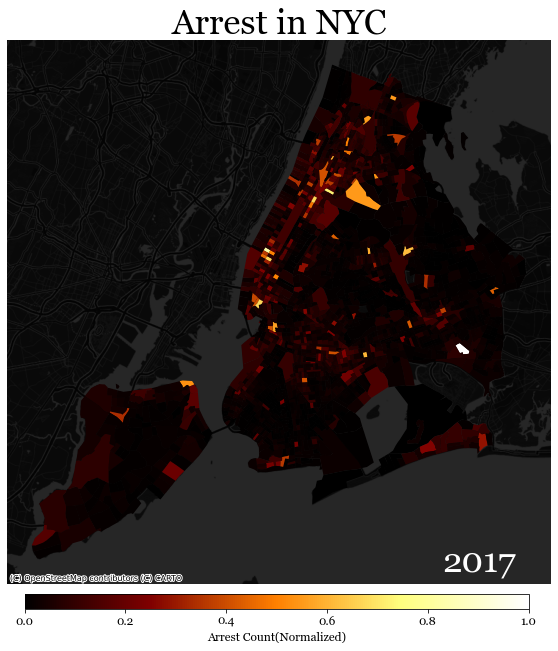

In [39]:
visGPD_MPL(featureFilePath, unitFilePath, featureLon, featureLat, unitName, year);

- **_Notion_**: You may notice that a semicolon is appended at the end of the above function call. Jupyter Notebooks will automatically display of the plot when `plt.plot()` is called in the code. But also, whenever the figure object is referenced as the last statement of the cell, another display will be triggered. Hence, we append a semicolon to prevent the displaying of the second plot.

##### Bonus: Make it animated!!

Sometimes, we are interested in knowing how the result change along with time change. We can observe this change by presenting a series of maps creating under different time frame at the same time. However, this might be overwhelming and too complex to observe. One of the approach to ease this pain is to create animated images. There are certainly a lot of ways you can do that but here, we are going to use `convert` command line tool from `ImageMagick` toolkit to create an animated GIF file. 

In [ ]:
def figCollection(outDir, startYear, endYear):
    """
    Function used to create a series of maps in specific time span. 
    """
    
    global featureFilePath, unitFilePath, featureLon, featureLat, unitName
    
    # Create a new dirctory to store the output figures and define output path
    os.makedirs(outDir) 
    outPath = os.path.join(path, outDir)

    #  Save the maps to the new directory
    for year in range(startYear, endYear+1):
        fig_year = visGPD_MPL(featureFilePath, unitFilePath,
                              featureLon, featureLat, unitName, year)
        fig_year.savefig(outPath+"/Arrest_{}.png".format(year), dpi=300)

In [ ]:
# Define unit and feature file path
featureFilePath = os.path.join(path, "NYC_Historic_Arrest_Clean.csv")
unitFilePath = os.path.join(path, "NYC_tract_2017.geojson")

# Define column names of lon/lat
featureLon = "Longitude"
featureLat = "Latitude"

# Define unit scale and year
unitName = "TRACTCEFP"

# Define output directory and time frame
outDir = "GPD_MPL_Output"
startYear = 2006
endYear = 2018

In [ ]:
figCollection(outDir, startYear, endYear);

`ImageMagick` is a powerful command line utility that allows you to create, edit, compose, or convert bitmap images. It can read and write images in a variety of formats (over 200) including PNG, JPEG, GIF, HEIC, and so on. In this tutorial, I only show you how to create a gif file through a group of images. There are tons of functions that `ImageMagick` can do. More information about `ImageMagick` can be found [here](https://imagemagick.org/index.php).

In [ ]:
# Convert a collection of images to gif
!convert -delay 60 -loop 0 GPD_MPL_Output/*.png GPD_MPL_Output/GPD_MPL.gif

In [ ]:
# Only retain the gif file and remove other image files
!rm GPD_MPL_Output/Arrest*

In [ ]:
# Display the gif file
HTML('<img src="GPD_MPL_Output/GPD_MPL.gif">')

## 4.2 Pandas with Datashader

In [40]:
def preProcess(inFilePath, useCols, catCol=None):
    """
    Function used to convert lat/lon to web mercator coordinates and cast colum to category type
    """
    
    # Read arrest file into dataframe
    df = pd.read_csv(inFilePath, usecols=useCols)
    
    # Be very careful that Longitude should be ahead of Latitude as the conversion function read Longitude first
    # Convert lon/lat to web mercator coordinate
    df.loc[:, "Easting"], df.loc[:, "Northing"] = webm(df["Longitude"], df["Latitude"])
    
    # Cast the targeted column to category dtype
    if catCol is not None:
        df[catCol] = df[catCol].astype("category")
        return df
    else:
        return df

In [41]:
def imgCreation(inFilePath, useCols, catCol=None, background=None, cWidth=600, cHeight=600):
    """
    Function used to render data into image
    """
    
    # Call the preProcess function
    df = preProcess(inFilePath, useCols, catCol)
    
    # Define the range for x and y
    xRange = (df["Easting"].min(), df["Easting"].max())
    yRange = (df["Northing"].min(), df["Northing"].max())
    
    # Create a canvas
    cvs = ds.Canvas(plot_height=cHeight, plot_width=cWidth,
                    x_range=xRange, y_range=yRange)

    # Aggregate records as points into canvas and shade them with colors, if the targeted column is given,
    # count the number of each category in the column
    if catCol is not None:
        agg = cvs.points(df, "Easting", "Northing", ds.count_cat(catCol))
        # Create a dictionary to assoicate each race with a distinct color
        color_dict = dict(zip(list(df[catCol].unique()), Set1))
        # Be cautious that you need to use color_key as parameter when you are counting the number of category
        img = tf.shade(agg, how="eq_hist", color_key=color_dict)
        exImg = tf.dynspread(img, threshold=0.6, max_px=10)
    else:
        agg = cvs.points(df, "Easting", "Northing")
        img = tf.shade(agg, how="eq_hist", cmap=Hot)
        exImg = tf.dynspread(img, threshold=0.6, max_px=10)

    # Set the background color
    if background is not None:
        return tf.set_background(exImg, background)
    else:
        return exImg

In [42]:
def legendCreation(inDataFrame, catCol):
    """
    Function used to create legend. Call this function when you count the number of category.
    """
    
    # Create a dictionary to assoicate each race with a distinct color 
    color_dict = dict(zip(list(inDataFrame[catCol].unique()), Set1))
    
    # Create a categorical legend
    cat_legend = create_categorical_legend(colormap=color_dict, font_size=8)
    
    return show(cat_legend)

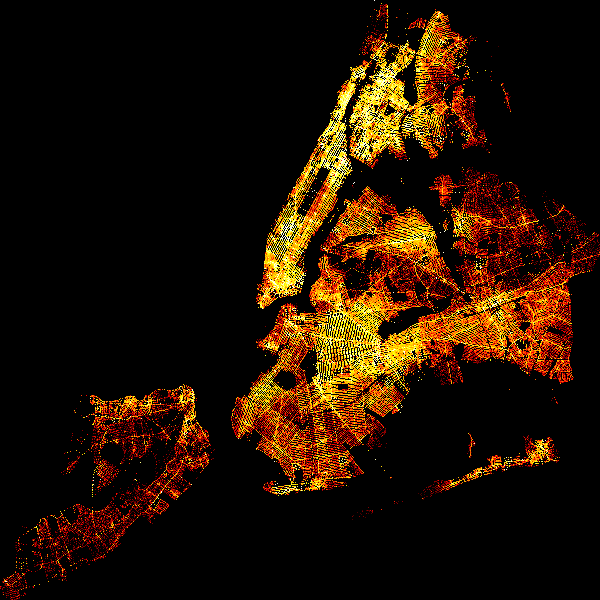

In [43]:
# Define file path and columns for coordinate conversion
inFilePath = os.path.join(path, "NYC_Historic_Arrest_Clean.csv")
useCols = ["Latitude", "Longitude"]

imgCreation(inFilePath, useCols, background="black")

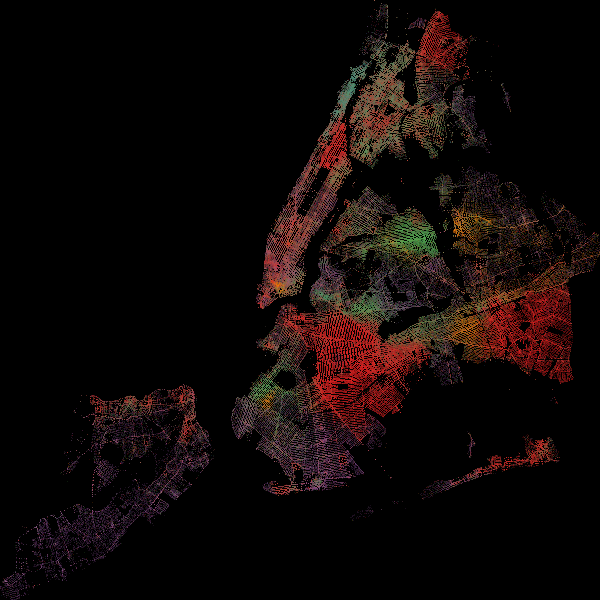

In [44]:
# Define file path, columns for coordinate conversion, and column categorize will be based on
inFilePath = os.path.join(path, "NYC_Historic_Arrest_Clean.csv")
useCols = ["Latitude", "Longitude", "PERP_RACE"]
catCol = "PERP_RACE"

imgCreation(inFilePath, useCols, catCol, background="black")

In [45]:
legendCreation(preProcess(inFilePath, useCols, catCol), catCol)

##### Bonus: Make it interactive

Most of the time, we would like to add some interactions to our "slippy" maps, such as enable zooming function and popup information. We can realize this expection on the map we created above using `Boken` library. `Boken` prides itself on being a library for interactive data visualization. It renders its graphic using HTML and JavaScript. You can choose to show your visualization either in **Jupyter Notebook** or a new **HTML** page. This tutorial output the result in Jupyter Notebook only shows you how to add some basic interactions on the map and you are encourage to [explore more](https://docs.bokeh.org/en/latest/index.html).

In [46]:
def xyRange(inFilePath, useCols):
    """
    Function used to define x and y range
    """
    
    # Call the preProcess function
    df = preProcess(inFilePath, useCols)

    # Get the minimum and maximum value of Easting and Northing
    xRange = (df["Easting"].min(), df["Easting"].max())
    yRange = (df["Northing"].min(), df["Northing"].max())

    return df, xRange, yRange

In [47]:
# Define file path and columns for coordinate conversion
inFilePath = os.path.join(path, "NYC_Historic_Arrest_Clean.csv")
useCols = ["Latitude", "Longitude"]

df, xRange, yRange = xyRange(inFilePath, useCols)

In [48]:
def create_image1(x_range=xRange, y_range=yRange, w=600, h=600):
    """
    This is a callable function that is required for the below "InteractiveImage" function
    """

    global df

    # Create a canvas, aggregate points, and shade colors
    cvs = ds.Canvas(plot_height=h, plot_width=w,
                    x_range=x_range, y_range=y_range)
    agg = cvs.points(df, "Easting", "Northing")
    img = tf.shade(agg, how="eq_hist", cmap=Hot)

    return tf.dynspread(img, threshold=0.6, max_px=15)

In [49]:
def base_plot(tools="pan,wheel_zoom,reset, save"):
    """
    Function used to create Bokeh figure
    """
    global xRange, yRange

    # Create a figure with given properties
    p = bp.figure(tools=tools, x_range=xRange, y_range=yRange,
                  outline_line_color=None, title="Historic Arrest in NYC (2006~2018)",
                  min_border=0, min_border_left=0, min_border_right=0,
                  min_border_top=0, min_border_bottom=0)

    # Reset parameters of figure elements
    p.title.align = "center"
    p.title.text_font_size = "20pt"
    p.title.text_font = "Georgia"
    p.axis.visible = False
    p.grid.grid_line_color = None

    # Add a tile basemap
    p.add_tile(WMTSTileSource(
        url="https://cartodb-basemaps-b.global.ssl.fastly.net/dark_all/{z}/{x}/{y}.png"))

    return p

In [50]:
InteractiveImage(base_plot(), create_image1)

# 5. Data Mining

## 5.1 Theory

Data mining techniques are often applied to find patterns for big data. These techniques came out of the fields of statistics and Artificial Intelligence (AI). In general, the goal of the data mining is either classification or prediction. The former predicts discrete outputs while the latter predicts continuous value outputs. In this tutorial, we only discuss one of the most common prediction techniques-- **_Ordinary Least Square (OLS) regression_**. 

OLS regression or linear regression is perhaps the simplest approach for statistical learning. It could be either simple or multiple depending on the number of explanatory variables. Learning this technique is a good starting point for more advanced approaches, and in fact, many fancy statistical learning techniques can be seen as an extension of linear regression. Linear regression performs the task to predict the **value of a target(dependent) variable($y$)** based on the given **explanatory(independent) variables($x_s$)**. Linear regression is useful to answer the following questions:

- Is there a relationship between target variable and explanatory variables?
- How strong is the relationship?
- Which variable contributes the most?
- How accurately can we estimate the effect of each variable?
- How accurately can we predict the target?


## 5.2 Equations

**_Simple Linear Regression_**: Use only one single explanatory variable($x$) to predict the value of a target variable($y$). The equation is as shown below (where $B_0$ is intercept and $B_1$ is coefficient):
___
\begin{align*}
y = B_0 + B_1x
\end{align*}
___
**_Multiple Linear Regression_**: Use multiple explanatory variables($x_s$) to predict the value of target variable($y$). The equation is as shown below (where $B_0$ is intercept and $B_s$ are coefficients):
___
\begin{align*}
y = B_0 + B_1x_1 + B_2x_2 + B_3x_3 + ... + B_sx_s
\end{align*}
___
To find these parameters, we need to minimize the **least squares** or the **sum of squared errors**. We will not discuss the equations used to determine these parameters here as they are beyond the scope of this tutorial. 

## 5.3 Assesments
Two important assessments are often undertaken after acquire the parameters. 
###### 1. Evaluate the relevancy of coefficients($B_s$)
- **_Simple Linear Regression_**: you will use **_p value_**. As a general rule of thumb, if the p-value is less than 0.05: there is a strong relationship between the explanatory variable and the target.
- **_Multiple Linear Regression_**: you will use **_F-statistic_**. The F-statistic is calculated for the overall model, whereas the p-value is specific to each predictor. If there is a strong relationship, then F will be much larger than 1. Otherwise, it will be approximately equal to 1.

###### 2. Evaluate the accuracy of the linear model
- Both **_Simple Linear Regression_** and **_Multiple Linear Regression_** use **_R² Metric_**. As for the R² metric, it measures the proportion of variability in the target that can be explained using a feature x. Therefore, assuming a linear relationship, if feature x can explain (predict) the target, then the proportion is high and the R² value will be close to 1. If the opposite is true, the R² value is then closer to 0.

## 5.4 Python Implementation

To perform linear regression, we will use the most popular Python libraries for machine learning: `scikit-learn` along with `pandas` and `statsmodels`. Recall from the beginning of this tutorial, I said that we will carry out a multiple linear regression based on deduced explanatory variables. These variables are population of **_(1) Age 25-44_** **_(2) Male_** **_(3) Black People_** **_(4) Below Poverty Level_** **_(5) Unemployed_** **_(6) No High School Diploma_**. 

>**_The objective here is to use multiple linear regression to understand how these six variables impact the number of arrest records in census tracts._**

We will first perform the spatial join function we defined above to calculate the number of arrest records in each census tract in the year of 2007 and merge the result to the demographic data. Then, we will run regression analysis to calculate the parameters and produce the OLS report to evaluate the relevancy and accuracy. 

In [51]:
def mergeCountDemographic(featureFilePath, unitFilePath, demoFilePath, featureLon, featureLat, unitName, year):
    """
    Function used to merge arrest count with demographic variables
    """
    
    # Call the spatial join function to get the number of arrest count in each tract
    arrest_in_tract_2017 = spatialJoin(featureFilePath, unitFilePath, featureLon, featureLat, unitName, year)
    
    # Read the demographic data into dataframe
    dfDemo = pd.read_json(demoFilePath, dtype={unitName: "object"})
    
    # Join count value to demographic variables based on the foreign key
    merge = pd.merge(dfDemo, arrest_in_tract_2017, on=unitName)
    
    # Reorder the columns
    count_with_demographic = merge[["Count", "Age_25-44", "Male", "Black_People", "Below_Poverty_Level", 
                                   "Unemployed", "No_High_School_Diploma", "TRACTCEFP"]]
    
    return count_with_demographic

In [52]:
# Define unit and feature file path
featureFilePath = os.path.join(path, "NYC_Historic_Arrest_Clean.csv")
unitFilePath = os.path.join(path, "NYC_tract_2017.geojson")
demoFilePath = os.path.join(path, "NYC_Demographic_2017_Clean.json")

# Define column names of lon/lat
featureLon = "Longitude"
featureLat = "Latitude"

# Define unit scale and year
unitName = "TRACTCEFP"
year = 2017

In [53]:
count_with_demographic = mergeCountDemographic(
    featureFilePath, unitFilePath, demoFilePath, featureLon, featureLat, unitName, year)
count_with_demographic.head(2)

,Count,Age_25-44,Male,Black_People,Below_Poverty_Level,Unemployed,No_High_School_Diploma,TRACTCEFP
0,9,726,563,10,1565,201,59,081011900
1,5,461,729,0,1607,242,59,081013500


In [54]:
# Select out the columns representing explanatory variables' values
Xs = count_with_demographic.drop(['Count', 'TRACTCEFP'], axis=1)
# Select out the column representing target variable's values
y = count_with_demographic['Count']

In [55]:
# Create a linear model and fit this model using target and explanatory variables
reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression()

In [56]:
# Print out all the parameters in the linear model
variables = ["Intercept"] + list(count_with_demographic.columns[1:7])
parameters = [round(reg.intercept_, 4)] + [round(coefficient, 4) for coefficient in reg.coef_]
print(dict(zip(variables, parameters)))

{'Intercept': 45.0522, 'Age_25-44': 0.0836, 'Male': 0.0016, 'Black_People': 0.0278, 'Below_Poverty_Level': -0.026, 'Unemployed': 0.0658, 'No_High_School_Diploma': 0.1376}


In [57]:
# Extract values of six explanatory variables from the dataframe
X = count_with_demographic[list(count_with_demographic.columns[1:7])].values
# Extract values of the target variable
y = count_with_demographic['Count']
# Explicitly specify the use of intercept in OLS method by adding a constant term called X2.
X2 = sm.add_constant(X)
# Create a model and fit the model
model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     42.35
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           4.68e-49
Time:                        20:27:51   Log-Likelihood:                -14598.
No. Observations:                2152   AIC:                         2.921e+04
Df Residuals:                    2145   BIC:                         2.925e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0522      9.368      4.809      0.0

## 5.5 Result Interpretation 
How to read the OLS results can refer to this [article](https://blog.datarobot.com/ordinary-least-squares-in-python)

According to the results. **_F-statistic_** is greater than 1 so we can assume that there is a relationship between the target variable and six explanatory variables. However, the value of **_R²_** is relatively small, merely 10% of variability in the target variable can be explained using six explanatory variables. As a result, we might need to find other possible explanatory variables to increase the R² value so as to enhance the accuracy of the model. 

You may also find explanatory variable 2(Population of Male) has the **_p value_** greater than 0.5. Therefore, population of male is not statistically significant and we can exclude it from the possible explanatory variable. 

# 6. Future Development

Nothing is perfect. There is certainly something that can be improved in this tutorial. In the following, I list out something that can be improved in the future. 
1. Improve efficiency. For example, using `Dask` module to take advantage of parallel computing strength to faciliate some tasks. 
2. Increase interactions. For example, making the legend hover on the map using `holoview`.
3. Take map design into consideration. For example, standardize data before creating choropleth maps. 
3. Apply more rigorous spatial statistics. For eaxmple, using Geographically Weighted Regression(GWR). 

# 7. Conclusion

In this tutorial, we start with obtaining and peeking datasets using command line utilities. Only few of command line utilites were introduced to you and there are a wide variety of them waiting you to discover to faciliate and streamline your workflows. If you are of particular interested in learning them, I will recommend this awesome book: [Data Science at the Command Line](https://www.datascienceatthecommandline.com/). You then applied different python modules to perform data munging, analysis, and visualization. Some of these modules are pretty common and popular in the field of data science, such as `pandas`, `matplotlib`, and `scikit-learn`. Being familiar with them is the must if you want to seek the future career in data science. Other modules like `datashader` and `bokeh` are more advanced modules for python visualization. In fact, they are products of [**_PyViz_**](https://pyviz.org/) project. This tutorial only show you some very basic approach to visualize the datasets and you are encouraged to explore more on your own. 

Thank you for reading this tutorial. If you think I can improve my code, if you have trouble reproducing the steps, or if you find any problem, let me know by sending email to this address lin00297@umn.edu